**https://github.com/MultiScale-BCI/IV-2a**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/IV-2a

/content/drive/My Drive/IV-2a


In [0]:
!pip install hmmlearn pkgconfig

     |████████████████████████████████| 153kB 3.4MB/s 
  Created wheel for hmmlearn: filename=hmmlearn-0.2.2-cp36-cp36m-linux_x86_64.whl size=325117 sha256=f3c09f76eef4f42da2f3854e3550f3e1ff78ca5e442c10c62a577a8545744017
  Stored in directory: /root/.cache/pip/wheels/2c/b6/0e/63a865a30e21e01d04f417d8995fbfb793d6bd464707efc546
Successfully built hmmlearn


In [0]:
!sudo pip install https://pub.ist.ac.at/~schloegl/biosig/prereleases/Biosig-1.9rc7.tar.gz

  Using cached https://pub.ist.ac.at/~schloegl/biosig/prereleases/Biosig-1.9rc7.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [0]:
!python main_csp.py

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Number of used features: 11352
Test data set
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
0.8683274021352313
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
Traceback (most recent call last):
  File "main_csp.py", line 187, in <module>
    m

In [0]:
#!/usr/bin/env python3

'''	Loads the dataset 2a of the BCI Competition IV
available on http://bnci-horizon-2020.eu/database/data-sets
'''

import numpy as np
import scipy.io as sio


def get_data(subject,  path_ds, training=False):
	'''	Loads the dataset 2a of the BCI Competition IV
	available on http://bnci-horizon-2020.eu/database/data-sets
	Keyword arguments:
	subject -- number of subject in [1, .. ,9]
	training -- if True, load training data
				if False, load testing data
	
	Return:	data_return 	numpy matrix 	size = NO_valid_trial x 22 x 1750
			class_return 	numpy matrix 	size = NO_valid_trial
	'''
	NO_channels = 22
	NO_tests = 6*48 	
	Window_Length = 7*250 

	class_return = np.zeros(NO_tests)
	data_return = np.zeros((NO_tests,NO_channels,Window_Length))

	NO_valid_trial = 0
	if training:
		a = sio.loadmat(path_ds+'A0'+str(subject)+'T.mat')
	else:
		a = sio.loadmat(path_ds+'A0'+str(subject)+'E.mat')
	a_data = a['data']
	for ii in range(0,a_data.size):
		a_data1 = a_data[0,ii]
		a_data2=[a_data1[0,0]]
		a_data3=a_data2[0]
		a_X 		= a_data3[0]
		a_trial 	= a_data3[1]
		a_y 		= a_data3[2]
		a_fs 		= a_data3[3]
		a_classes 	= a_data3[4]
		a_artifacts = a_data3[5]
		a_gender 	= a_data3[6]
		a_age 		= a_data3[7]
		for trial in range(0,a_trial.size):
			if(a_artifacts[trial]==0):
				data_return[NO_valid_trial,:,:] = np.transpose(a_X[int(a_trial[trial]):(int(a_trial[trial])+Window_Length),:22])
				class_return[NO_valid_trial] = int(a_y[trial])
				NO_valid_trial +=1


	return data_return[0:NO_valid_trial,:,:], class_return[0:NO_valid_trial]

  
path_ds = '/content/drive/My Drive/IV-2a/dataset/'
data_return, class_return = get_data(1,  path_ds, training=True)

In [0]:
class_return.shape

(273,)

In [0]:
data_return.shape

(273, 22, 1750)

In [0]:
len(data_return)

273

In [0]:
class_return

array([4., 3., 2., 1., 1., 2., 3., 4., 2., 3., 1., 1., 1., 4., 2., 2., 1.,
       1., 3., 1., 2., 4., 3., 1., 4., 4., 2., 4., 4., 2., 1., 2., 3., 3.,
       3., 4., 3., 1., 4., 2., 3., 2., 3., 4., 3., 1., 1., 1., 4., 2., 3.,
       1., 3., 4., 1., 3., 3., 1., 3., 2., 4., 4., 4., 1., 4., 2., 4., 2.,
       1., 3., 2., 1., 3., 3., 1., 3., 4., 4., 2., 1., 2., 4., 2., 4., 3.,
       2., 2., 2., 3., 1., 2., 3., 3., 4., 1., 1., 2., 4., 4., 4., 2., 1.,
       3., 2., 4., 1., 4., 3., 2., 4., 4., 1., 2., 2., 3., 4., 2., 1., 1.,
       4., 2., 1., 3., 2., 2., 3., 1., 4., 3., 3., 3., 3., 1., 2., 1., 2.,
       1., 1., 3., 3., 2., 3., 4., 1., 4., 1., 1., 2., 4., 3., 2., 4., 3.,
       4., 3., 4., 2., 2., 4., 1., 2., 2., 2., 3., 4., 1., 4., 1., 3., 1.,
       4., 1., 3., 1., 2., 3., 3., 4., 1., 2., 4., 2., 3., 1., 4., 2., 4.,
       1., 1., 3., 3., 2., 4., 2., 2., 1., 2., 4., 4., 2., 2., 2., 2., 4.,
       3., 4., 1., 2., 3., 2., 1., 4., 1., 4., 1., 1., 1., 1., 3., 4., 2.,
       3., 3., 3., 4., 3.

In [0]:
class_column = []
for i in range(len(class_return)):
  for j in range(1750):
    class_column.append(int(class_return[i]))
len(class_column)

477750

In [0]:
class_column[1740:1760]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [0]:
data_reshaped = data_return.reshape(273*1750,22)
data_reshaped.shape

(477750, 22)

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


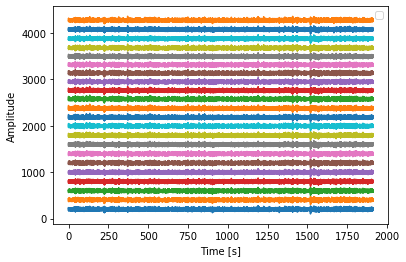

In [0]:
plot_multichannel(data_reshaped)



In [0]:
import pandas as pd
df = pd.DataFrame(data = data_reshaped)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,-5.712891,-6.884766,-3.808594,-6.591797,4.687500,1.513672,-2.294922,-3.613281,-4.589844,-10.791016,-4.687500,-2.392578,5.468750,8.789062,11.865234,6.591797,6.201172,6.591797,12.939453,15.820312,26.855469,25.488281
1,30.029297,31.494141,35.107422,38.574219,44.531250,47.460938,53.125000,45.312500,52.929688,55.615234,61.816406,58.593750,54.980469,43.505859,38.085938,31.835938,21.191406,26.123047,19.873047,17.285156,11.523438,7.177734
2,5.957031,2.636719,4.003906,1.708984,5.175781,7.421875,6.591797,6.933594,8.300781,6.982422,1.318359,-2.880859,-3.662109,-1.904297,2.783203,4.199219,8.300781,13.134766,17.626953,16.699219,17.626953,13.574219
3,13.378906,10.546875,7.568359,11.474609,11.816406,8.300781,0.830078,-3.955078,-0.292969,-6.445312,-9.863281,-8.105469,-14.501953,-14.941406,-23.193359,-26.708984,-24.511719,-30.126953,-34.277344,-34.082031,-35.791016,-31.689453
4,-29.150391,-20.556641,-17.724609,-15.283203,-16.601562,-20.947266,-22.314453,-23.828125,-27.343750,-24.804688,-20.751953,-18.652344,-18.798828,-12.988281,-11.767578,-8.203125,-8.691406,-9.375000,-6.396484,-12.207031,-18.066406,-18.505859


In [0]:
df.shape

(477750, 22)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3572bd50f0>,
      dtype=object)

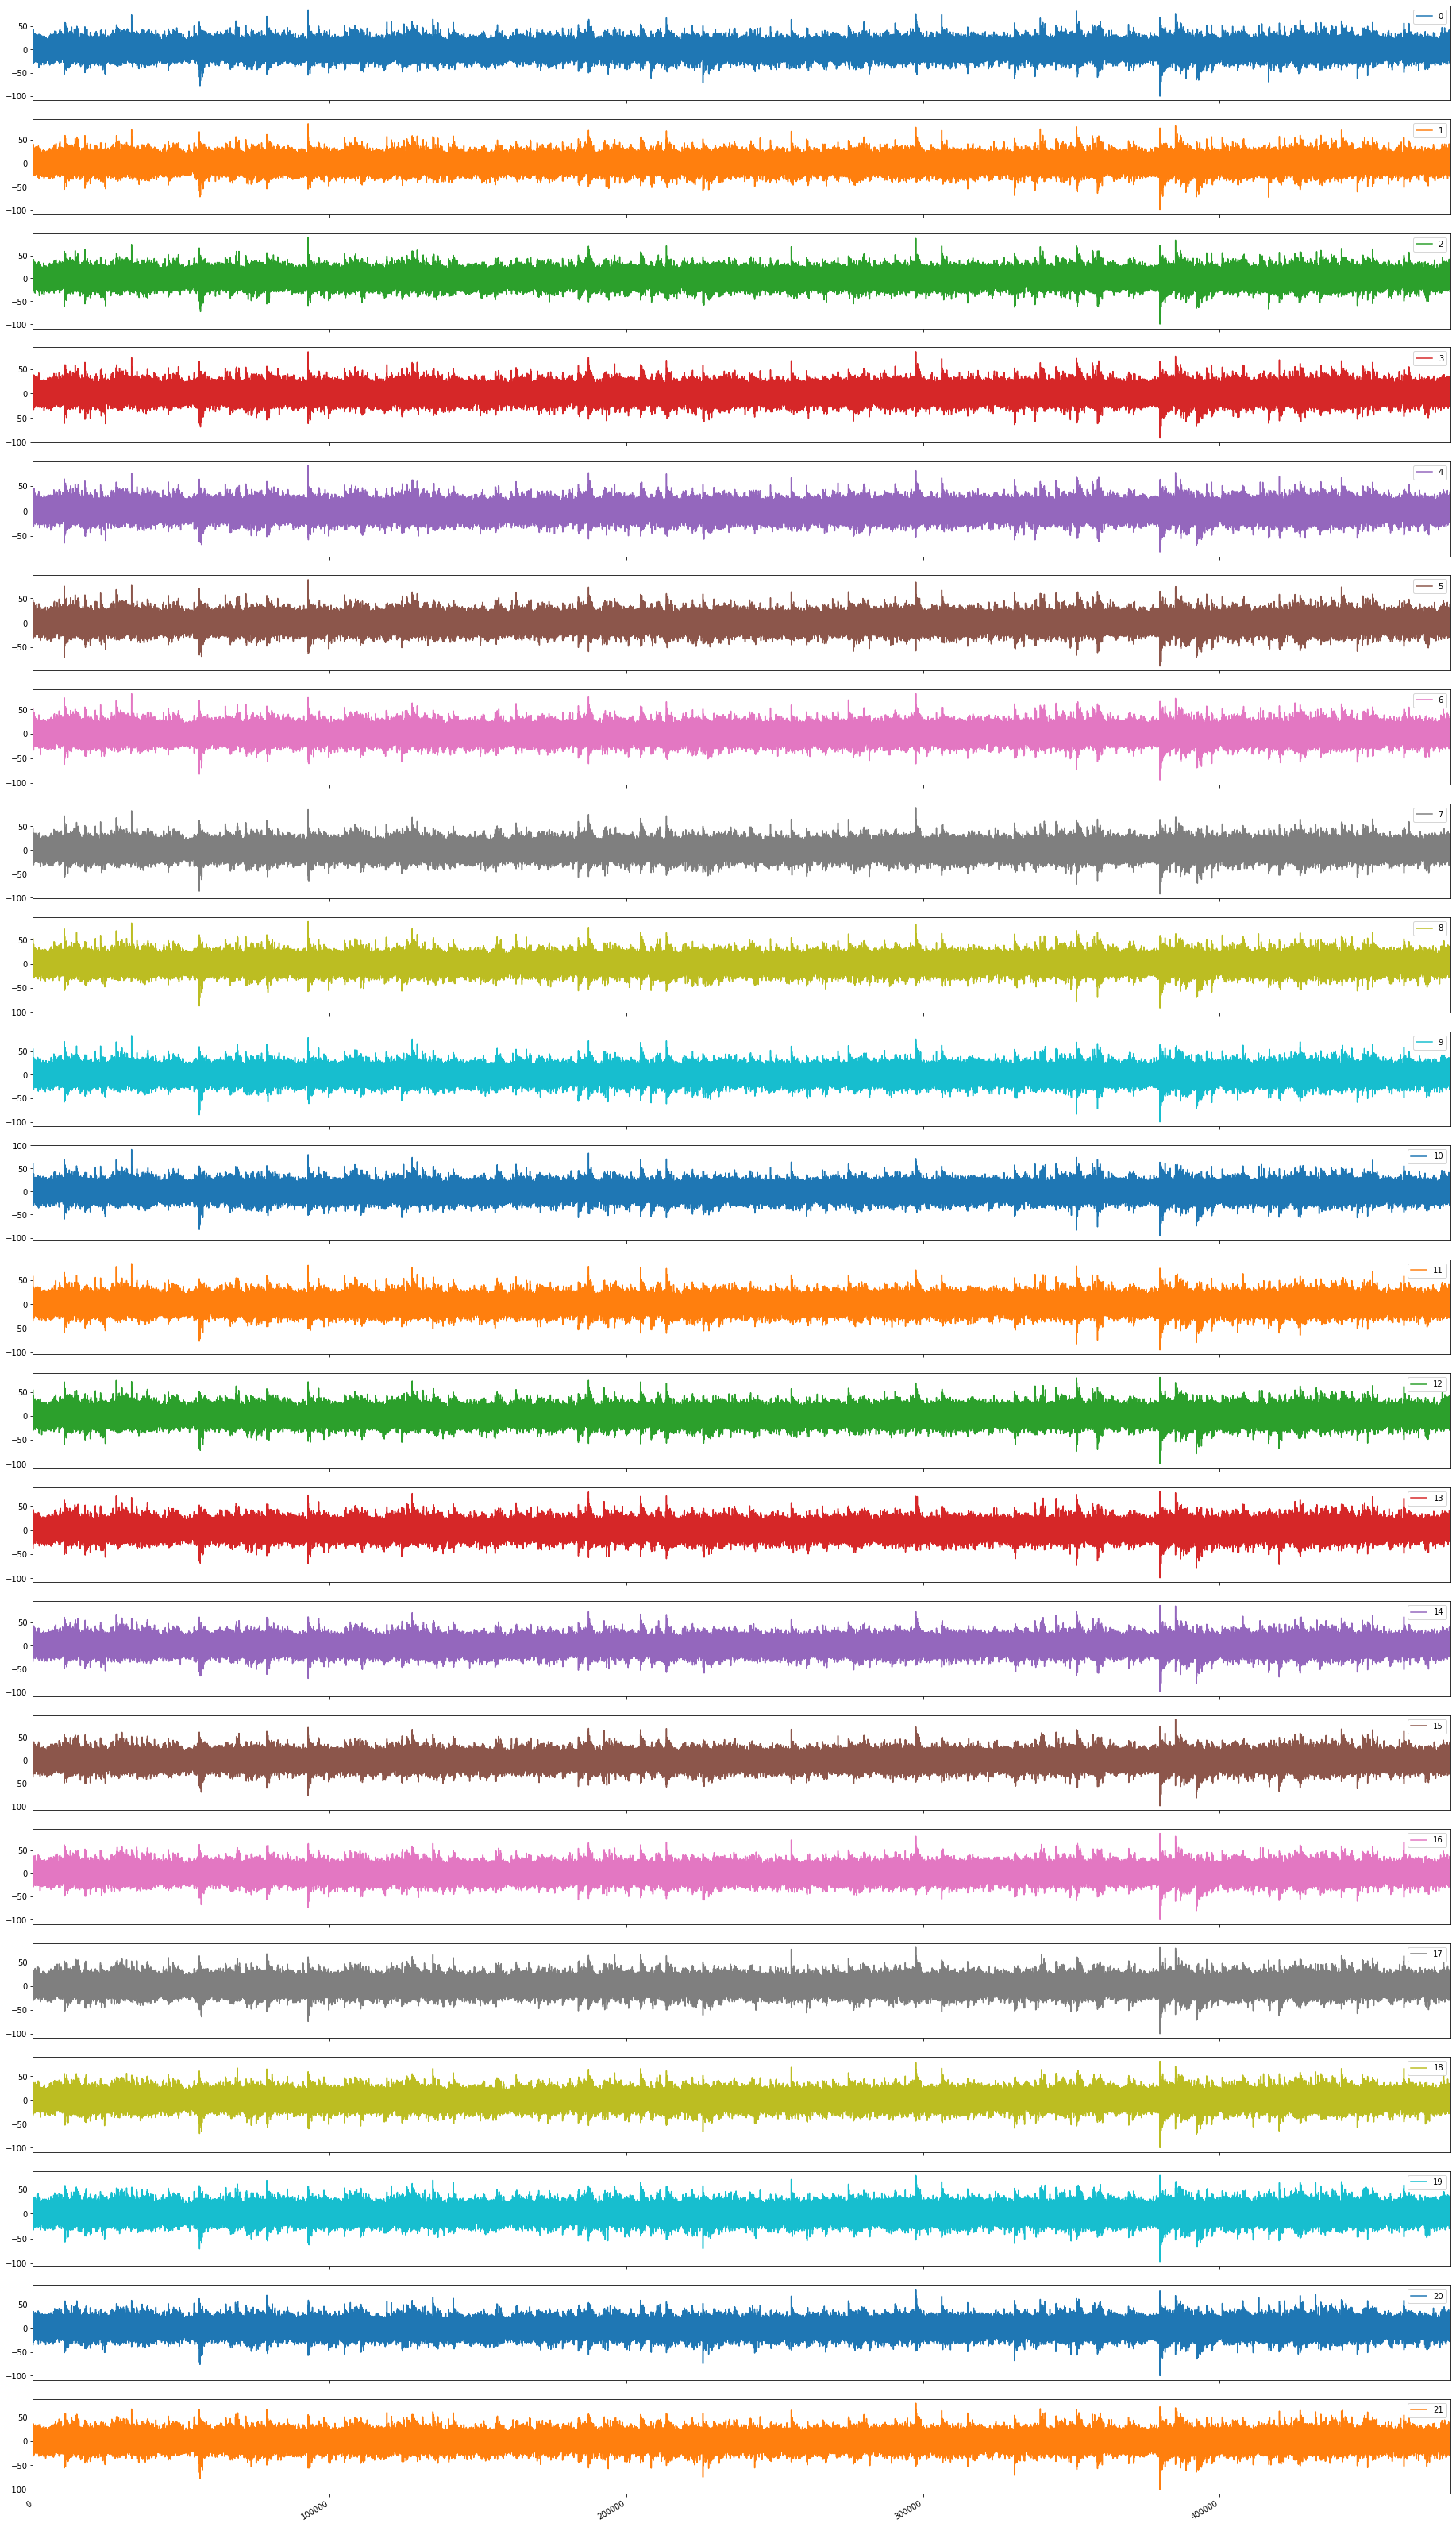

In [0]:
%matplotlib inline
df.plot(subplots=True, figsize=(32, 64))

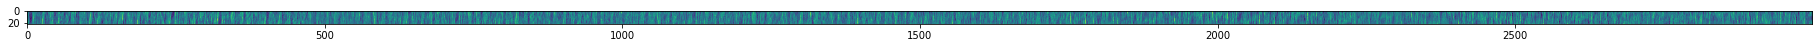

In [0]:
plt.figure(figsize=(32, 64))
plt.imshow(df[0:3000].values.T)

In [0]:
epochs = epoch(data_reshaped, 1750)
epochs.shape

(1750, 22, 273)

In [0]:
# data_return = epochs (3D)
# data_reshaped (2D)
fs = 250
feature_matrix = compute_feature_matrix(epochs, fs)
feature_matrix.shape

(273, 88)

No handles with labels found to put in legend.


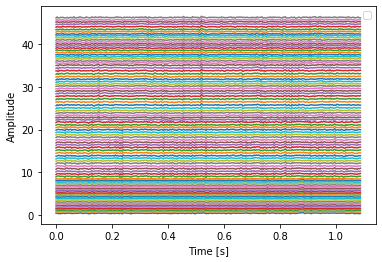

In [0]:
plot_multichannel(feature_matrix)

In [0]:
import pandas as pd
df_ft = pd.DataFrame(feature_matrix)
df_ft.shape

(273, 88)

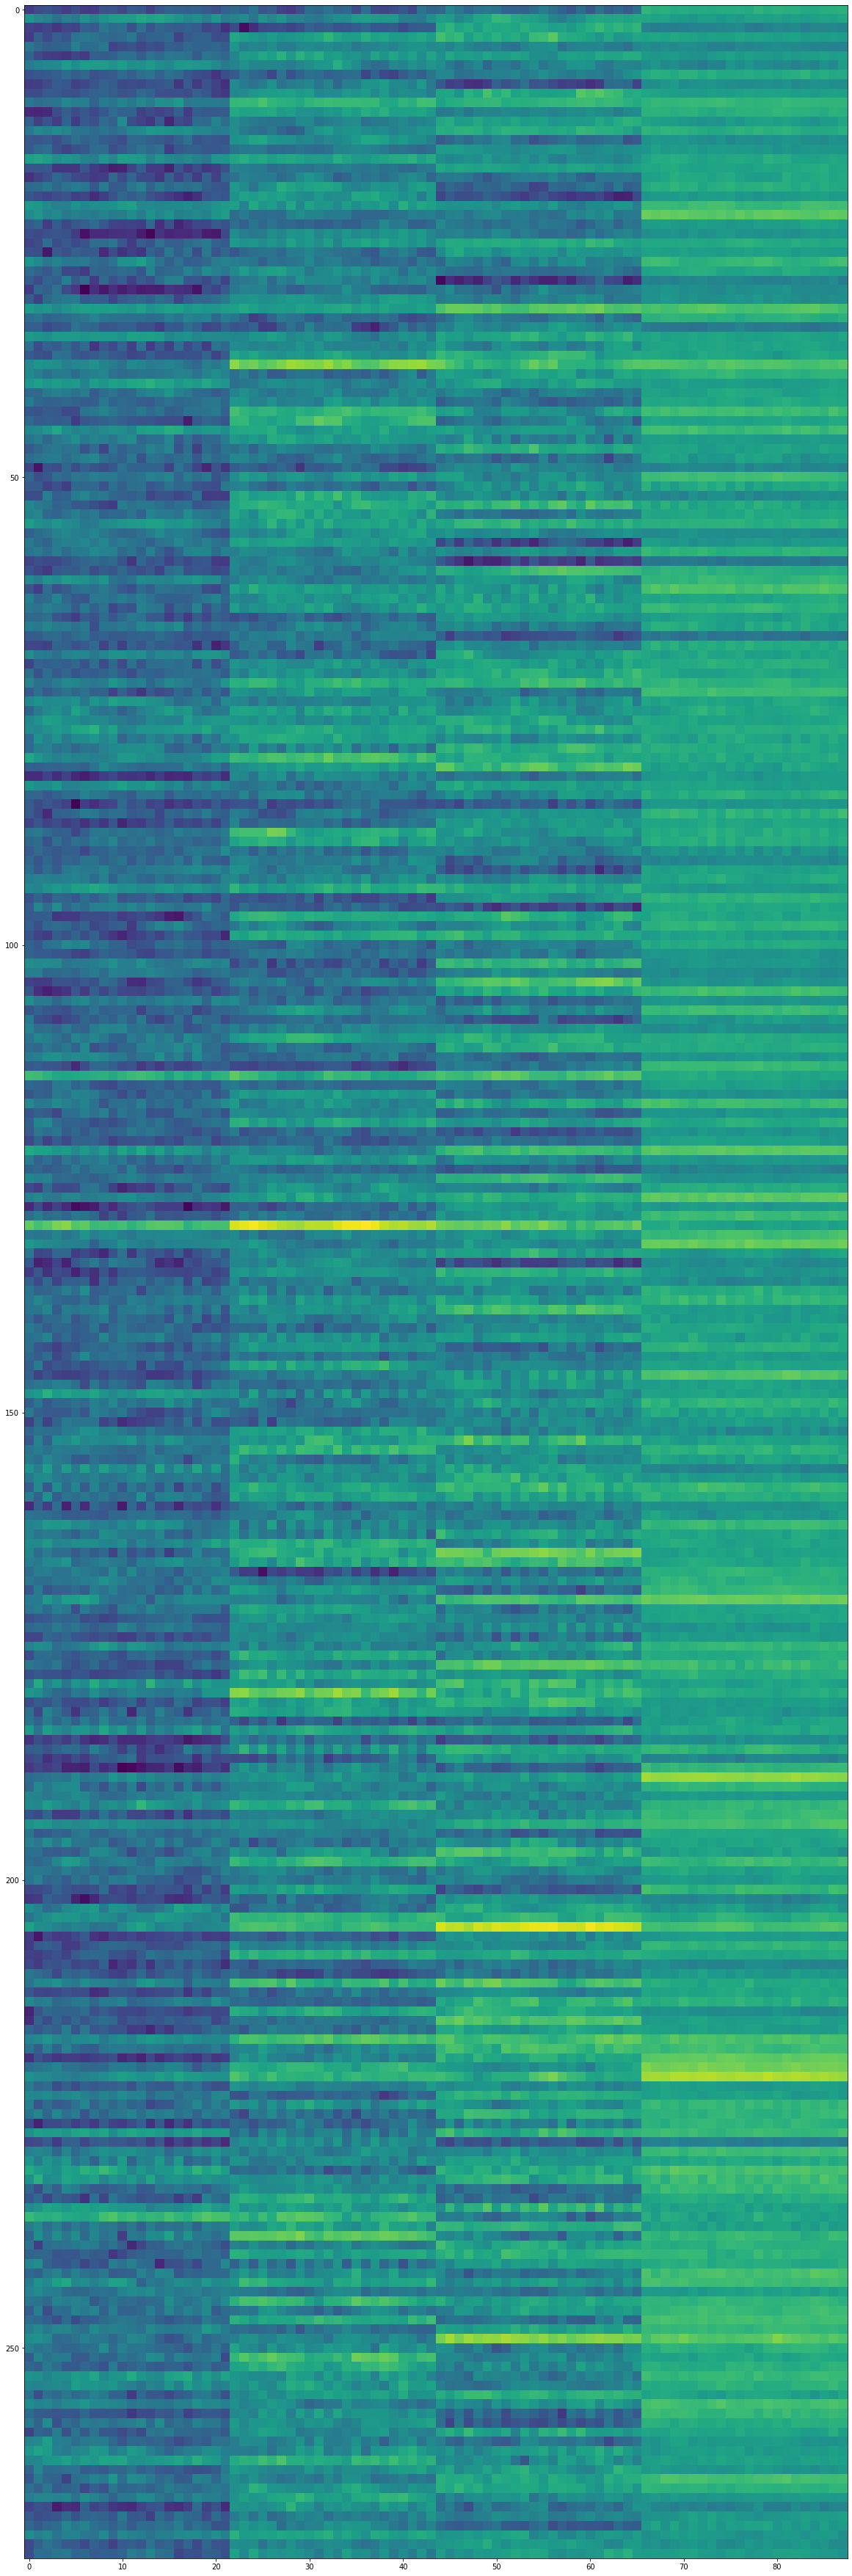

In [0]:
plt.figure(figsize=(32, 64)) # # Este grafico no tiene sentido, primero hay que separar las 4 bandas por canal
plt.imshow(df_ft.values)

In [0]:
from matplotlib import pyplot as plt

df_ft.T.plot(subplots=True, figsize=(42,56))  # Este grafico no tiene sentido, primero hay que separar las 4 bandas por canal

In [0]:
df_ft.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87
0,-0.836719,-0.802021,-0.787545,-0.805932,-0.834518,-0.792702,-0.841871,-0.841150,-0.779545,-0.777705,-0.806545,-0.759047,-0.769116,-0.823571,-0.770781,-0.739632,-0.746583,-0.750104,-0.746548,-0.766213,-0.787473,-0.742385,-0.721696,-0.752106,-0.690890,-0.777516,-0.754970,-0.826731,-0.845798,-0.793855,-0.714652,-0.728103,-0.697248,-0.740277,-0.730030,-0.796146,-0.706954,-0.804676,-0.815711,-0.793903,...,-0.701287,-0.685877,-0.693477,-0.735677,-0.738668,-0.744498,-0.711855,-0.668469,-0.704010,-0.736837,-0.776658,-0.710078,-0.772473,-0.697936,-0.753219,-0.725261,-0.759394,-0.711120,-0.504037,-0.528600,-0.521379,-0.534726,-0.532189,-0.536626,-0.533052,-0.537865,-0.531633,-0.530215,-0.527548,-0.535719,-0.510585,-0.532090,-0.515630,-0.525017,-0.523704,-0.536316,-0.538903,-0.528738,-0.524347,-0.521290
1,-0.595660,-0.638932,-0.649126,-0.698914,-0.658216,-0.678848,-0.609955,-0.647375,-0.602305,-0.580093,-0.573172,-0.575093,-0.539024,-0.561949,-0.544456,-0.570830,-0.600864,-0.640079,-0.620699,-0.657498,-0.589687,-0.667783,-0.654029,-0.624252,-0.687162,-0.601456,-0.638804,-0.598986,-0.653844,-0.650862,-0.673932,-0.687223,-0.647470,-0.619691,-0.627284,-0.571826,-0.570483,-0.578843,-0.587101,-0.584718,...,-0.549320,-0.544051,-0.495825,-0.503406,-0.537672,-0.556277,-0.559990,-0.585951,-0.646330,-0.670151,-0.626008,-0.609910,-0.555265,-0.542015,-0.556100,-0.545538,-0.556669,-0.539328,-0.550045,-0.562285,-0.557049,-0.581345,-0.583099,-0.592830,-0.572451,-0.574189,-0.593380,-0.570953,-0.588463,-0.560649,-0.560341,-0.565574,-0.560697,-0.578635,-0.568993,-0.577796,-0.566228,-0.555176,-0.562587,-0.547323
2,-0.825489,-0.839815,-0.814455,-0.849861,-0.813882,-0.821956,-0.744616,-0.761508,-0.686753,-0.717767,-0.703942,-0.788294,-0.701042,-0.776451,-0.729422,-0.751403,-0.762709,-0.744378,-0.759074,-0.815421,-0.802467,-0.865012,-0.804041,-0.933742,-0.869275,-0.811227,-0.804144,-0.795203,-0.821829,-0.796433,-0.742585,-0.762947,-0.748594,-0.783877,-0.774697,-0.757631,-0.731596,-0.771752,-0.771446,-0.756198,...,-0.574246,-0.532636,-0.548821,-0.538139,-0.553182,-0.516187,-0.545071,-0.545567,-0.569471,-0.561158,-0.586124,-0.549705,-0.527076,-0.493925,-0.529127,-0.503369,-0.529545,-0.503705,-0.652288,-0.666196,-0.661818,-0.665908,-0.663741,-0.653348,-0.647461,-0.653135,-0.646308,-0.640821,-0.625471,-0.669046,-0.673073,-0.652404,-0.634918,-0.643893,-0.633583,-0.664012,-0.645560,-0.643764,-0.638451,-0.647914
3,-0.839907,-0.748766,-0.808242,-0.751977,-0.776625,-0.695694,-0.681501,-0.694149,-0.716566,-0.731423,-0.718103,-0.681462,-0.766045,-0.738040,-0.740437,-0.724847,-0.819519,-0.761665,-0.739438,-0.741891,-0.800252,-0.794386,-0.545851,-0.565296,-0.591280,-0.608661,-0.581014,-0.609476,-0.593906,-0.585942,-0.567717,-0.551991,-0.506550,-0.549321,-0.575795,-0.574125,-0.526543,-0.564181,-0.545433,-0.579153,...,-0.528181,-0.553610,-0.518636,-0.545647,-0.529410,-0.563381,-0.492491,-0.484939,-0.446005,-0.522725,-0.535244,-0.540828,-0.563194,-0.593129,-0.538480,-0.600119,-0.589581,-0.553609,-0.558326,-0.549260,-0.557584,-0.543297,-0.556154,-0.560584,-0.571474,-0.563720,-0.565517,-0.566850,-0.554338,-0.562687,-0.555326,-0.564270,-0.572139,-0.563143,-0.558087,-0.582718,-0.572605,-0.578391,-0.568415,-0.576559
4,-0.684822,-0.721397,-0.751204,-0.744577,-0.737566,-0.661809,-0.718145,-0.709484,-0.685351,-0.821243,-0.792835,-0.782343,-0.812785,-0.786441,-0.801788,-0.745067,-0.757676,-0.720571,-0.738351,-0.737858,-0.728654,-0.754928,-0.598039,-0.663778,-0.643474,-0.651273,-0.616346,-0.670196,-0.671527,-0.632857,-0.624373,-0.637411,-0.626019,-0.649927,-0.634956,-0.683834,-0.653385,-0.654430,-0.632882,-0.653204,...,-0.667108,-0.677451,-0.651248,-0.693637,-0.700750,-0.647239,-0.619592,-0.621243,-0.603457,-0.698178,-0.657773,-0.641300,-0.641880,-0.64

In [0]:
df_ft.to_pickle('/content/drive/My Drive/tf_EEGLearn/SampleData/df_ft.pkl')

In [0]:
pd.DataFrame(class_return).to_pickle('/content/drive/My Drive/tf_EEGLearn/SampleData/class_df.pkl')

In [0]:
# -*- coding: utf-8 -*-
"""
BCI Workshop Auxiliary Tools
Created on Fri May 08 15:34:59 2015
@author: Cassani
"""

import os
import sys
from tempfile import gettempdir
from subprocess import call

import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from scipy.signal import butter, lfilter, lfilter_zi
%matplotlib inline

NOTCH_B, NOTCH_A = butter(4, np.array([55, 65])/(256/2), btype='bandstop')


def plot_multichannel(data, params=None):
    """Create a plot to present multichannel data.
    Args:
        data (numpy.ndarray):  Multichannel Data [n_samples, n_channels]
        params (dict): information about the data acquisition device
    TODO Receive labels as arguments
    """
    fig, ax = plt.subplots()

    n_samples = data.shape[0]
    n_channels = data.shape[1]

    if params is not None:
        fs = params['sampling frequency']
        names = params['names of channels']
    else:
        #fs = 1
        fs = 250
        names = [''] * n_channels

    time_vec = np.arange(n_samples) / float(fs)

    data = np.fliplr(data)
    offset = 0
    for i_channel in range(n_channels):
        data_ac = data[:, i_channel] - np.mean(data[:, i_channel])
        offset = offset + 2 * np.max(np.abs(data_ac))
        ax.plot(time_vec, data_ac + offset, label=names[i_channel])

    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Amplitude')
    plt.legend()
    plt.draw()


def epoch(data, samples_epoch, samples_overlap=0):
    """Extract epochs from a time series.
    Given a 2D array of the shape [n_samples, n_channels]
    Creates a 3D array of the shape [wlength_samples, n_channels, n_epochs]
    Args:
        data (numpy.ndarray or list of lists): data [n_samples, n_channels]
        samples_epoch (int): window length in samples
        samples_overlap (int): Overlap between windows in samples
    Returns:
        (numpy.ndarray): epoched data of shape
    """

    if isinstance(data, list):
        data = np.array(data)

    n_samples, n_channels = data.shape

    samples_shift = samples_epoch - samples_overlap

    n_epochs =  int(np.floor((n_samples - samples_epoch) / float(samples_shift)) + 1)

    # Markers indicate where the epoch starts, and the epoch contains samples_epoch rows
    markers = np.asarray(range(0, n_epochs + 1)) * samples_shift
    markers = markers.astype(int)

    # Divide data in epochs
    epochs = np.zeros((samples_epoch, n_channels, n_epochs))

    for i in range(0, n_epochs):
        epochs[:, :, i] = data[markers[i]:markers[i] + samples_epoch, :]

    return epochs


def compute_feature_vector(eegdata, fs):
    """Extract the features from the EEG.
    Args:
        eegdata (numpy.ndarray): array of dimension [number of samples,
                number of channels]
        fs (float): sampling frequency of eegdata
    Returns:
        (numpy.ndarray): feature matrix of shape [number of feature points,
            number of different features]
    """
    # 1. Compute the PSD
    winSampleLength, nbCh = eegdata.shape

    # Apply Hamming window
    w = np.hamming(winSampleLength)
    dataWinCentered = eegdata - np.mean(eegdata, axis=0)  # Remove offset
    dataWinCenteredHam = (dataWinCentered.T*w).T

    NFFT = nextpow2(winSampleLength)
    Y = np.fft.fft(dataWinCenteredHam, n=NFFT, axis=0)/winSampleLength
    PSD = 2*np.abs(Y[0:int(NFFT/2), :])
    f = fs/2*np.linspace(0, 1, int(NFFT/2))

    # SPECTRAL FEATURES
    # Average of band powers
    # Delta <4
    ind_delta, = np.where(f < 4)
    meanDelta = np.mean(PSD[ind_delta, :], axis=0)
    # Theta 4-8
    ind_theta, = np.where((f >= 4) & (f <= 8))
    meanTheta = np.mean(PSD[ind_theta, :], axis=0)
    # Alpha 8-12
    ind_alpha, = np.where((f >= 8) & (f <= 12))
    meanAlpha = np.mean(PSD[ind_alpha, :], axis=0)
    # Beta 12-30
    ind_beta, = np.where((f >= 12) & (f < 30))
    meanBeta = np.mean(PSD[ind_beta, :], axis=0)

    feature_vector = np.concatenate((meanDelta, meanTheta, meanAlpha,
                                     meanBeta), axis=0)

    feature_vector = np.log10(feature_vector)

    return feature_vector


def nextpow2(i):
    """
    Find the next power of 2 for number i
    """
    n = 1
    while n < i:
        n *= 2
    return n


def compute_feature_matrix(epochs, fs):
    """
    Call compute_feature_vector for each EEG epoch
    """
    n_epochs = epochs.shape[2]

    for i_epoch in range(n_epochs):
        if i_epoch == 0:
            feat = compute_feature_vector(epochs[:, :, i_epoch], fs).T
            feature_matrix = np.zeros((n_epochs, feat.shape[0])) # Initialize feature_matrix

        feature_matrix[i_epoch, :] = compute_feature_vector(
                epochs[:, :, i_epoch], fs).T

    return feature_matrix


def train_classifier(feature_matrix_0, feature_matrix_1, algorithm='SVM'):
    """Train a binary classifier.
    Train a binary classifier. First perform Z-score normalization, then
    fit
    Args:
        feature_matrix_0 (numpy.ndarray): array of shape (n_samples,
            n_features) with examples for Class 0
        feature_matrix_0 (numpy.ndarray): array of shape (n_samples,
            n_features) with examples for Class 1
        alg (str): Type of classifer to use. Currently only SVM is
            supported.
    Returns:
        (sklearn object): trained classifier (scikit object)
        (numpy.ndarray): normalization mean
        (numpy.ndarray): normalization standard deviation
    """
    # Create vector Y (class labels)
    class0 = np.zeros((feature_matrix_0.shape[0], 1))
    class1 = np.ones((feature_matrix_1.shape[0], 1))

    # Concatenate feature matrices and their respective labels
    y = np.concatenate((class0, class1), axis=0)
    features_all = np.concatenate((feature_matrix_0, feature_matrix_1),
                                  axis=0)

    # Normalize features columnwise
    mu_ft = np.mean(features_all, axis=0)
    std_ft = np.std(features_all, axis=0)

    X = (features_all - mu_ft) / std_ft

    # Train SVM using default parameters
    clf = svm.SVC()
    clf.fit(X, y)
    score = clf.score(X, y.ravel())

    # Visualize decision boundary
#    plot_classifier_training(clf, X, y, features_to_plot=[0, 1])

    return clf, mu_ft, std_ft, score


def test_classifier(clf, feature_vector, mu_ft, std_ft):
    """Test the classifier on new data points.
    Args:
        clf (sklearn object): trained classifier
        feature_vector (numpy.ndarray): array of shape (n_samples,
            n_features)
        mu_ft (numpy.ndarray): normalization mean
        std_ft (numpy.ndarray): normalization standard deviation
    Returns:
        (numpy.ndarray): decision of the classifier on the data points
    """

    # Normalize feature_vector
    x = (feature_vector - mu_ft) / std_ft
    y_hat = clf.predict(x)

    return y_hat


def beep(waveform=(79, 45, 32, 50, 99, 113, 126, 127)):
    """Play a beep sound.
    Cross-platform sound playing with standard library only, no sound
    file required.
    From https://gist.github.com/juancarlospaco/c295f6965ed056dd08da
    """
    wavefile = os.path.join(gettempdir(), "beep.wav")
    if not os.path.isfile(wavefile) or not os.access(wavefile, os.R_OK):
        with open(wavefile, "w+") as wave_file:
            for sample in range(0, 300, 1):
                for wav in range(0, 8, 1):
                    wave_file.write(chr(waveform[wav]))
    if sys.platform.startswith("linux"):
        return call("chrt -i 0 aplay '{fyle}'".format(fyle=wavefile),
                    shell=1)
    if sys.platform.startswith("darwin"):
        return call("afplay '{fyle}'".format(fyle=wavefile), shell=True)
    if sys.platform.startswith("win"):  # FIXME: This is Ugly.
        return call("start /low /min '{fyle}'".format(fyle=wavefile),
                    shell=1)


def get_feature_names(ch_names):
    """Generate the name of the features.
    Args:
        ch_names (list): electrode names
    Returns:
        (list): feature names
    """
    bands = ['delta', 'theta', 'alpha', 'beta']

    feat_names = []
    for band in bands:
        for ch in range(len(ch_names)):
            feat_names.append(band + '-' + ch_names[ch])

    return feat_names


def update_buffer(data_buffer, new_data, notch=False, filter_state=None):
    """
    Concatenates "new_data" into "data_buffer", and returns an array with
    the same size as "data_buffer"
    """
    if new_data.ndim == 1:
        new_data = new_data.reshape(-1, data_buffer.shape[1])

    if notch:
        if filter_state is None:
            filter_state = np.tile(lfilter_zi(NOTCH_B, NOTCH_A),
                                   (data_buffer.shape[1], 1)).T
        new_data, filter_state = lfilter(NOTCH_B, NOTCH_A, new_data, axis=0,
                                         zi=filter_state)

    new_buffer = np.concatenate((data_buffer, new_data), axis=0)
    new_buffer = new_buffer[new_data.shape[0]:, :]

    return new_buffer, filter_state


def get_last_data(data_buffer, newest_samples):
    """
    Obtains from "buffer_array" the "newest samples" (N rows from the
    bottom of the buffer)
    """
    new_buffer = data_buffer[(data_buffer.shape[0] - newest_samples):, :]

    return new_buffer


class DataPlotter():
    """
    Class for creating and updating a line plot.
    """

    def __init__(self, nbPoints, chNames, fs=None, title=None):
        """Initialize the figure."""

        self.nbPoints = nbPoints
        self.chNames = chNames
        self.nbCh = len(self.chNames)

        self.fs = 1 if fs is None else fs
        self.figTitle = '' if title is None else title

        data = np.empty((self.nbPoints, 1))*np.nan
        self.t = np.arange(data.shape[0])/float(self.fs)

        # Create offset parameters for plotting multiple signals
        self.yAxisRange = 100
        self.chRange = self.yAxisRange/float(self.nbCh)
        self.offsets = np.round((np.arange(self.nbCh)+0.5)*(self.chRange))

        # Create the figure and axis
        plt.ion()
        self.fig, self.ax = plt.subplots()
        self.ax.set_yticks(self.offsets)
        self.ax.set_yticklabels(self.chNames)

        # Initialize the figure
        self.ax.set_title(self.figTitle)

        self.chLinesDict = {}
        for i, chName in enumerate(self.chNames):
            self.chLinesDict[chName], = self.ax.plot(
                    self.t, data+self.offsets[i], label=chName)

        self.ax.set_xlabel('Time')
        self.ax.set_ylim([0, self.yAxisRange])
        self.ax.set_xlim([np.min(self.t), np.max(self.t)])

        plt.show()

    def update_plot(self, data):
        """ Update the plot """

        data = data - np.mean(data, axis=0)
        std_data = np.std(data, axis=0)
        std_data[np.where(std_data == 0)] = 1
        data = data/std_data*self.chRange/5.0

        for i, chName in enumerate(self.chNames):
            self.chLinesDict[chName].set_ydata(data[:, i] + self.offsets[i])

        self.fig.canvas.draw()

    def clear(self):
        """ Clear the figure """

        blankData = np.empty((self.nbPoints, 1))*np.nan

        for i, chName in enumerate(self.chNames):
            self.chLinesDict[chName].set_ydata(blankData)

        self.fig.canvas.draw()

    def close(self):
        """ Close the figure """

        plt.close(self.fig)


def plot_classifier_training(clf, X, y, features_to_plot=[0, 1]):
    """Visualize the decision boundary of a classifier.
    Args:
        clf (sklearn object): trained classifier
        X (numpy.ndarray): data to visualize the decision boundary for
        y (numpy.ndarray): labels for X
    Keyword Args:
        features_to_plot (list): indices of the two features to use for
            plotting
    Inspired from: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
    """

    plot_colors = "bry"
    plot_step = 0.02
    n_classes = len(np.unique(y))

    x_min = np.min(X[:, 1])-1
    x_max = np.max(X[:, 1])+1
    y_min = np.min(X[:, 0])-1
    y_max = np.max(X[:, 0])+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis('tight')